## 3.1.4 로지스틱 회귀와 선형 회귀

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [4]:
# digits dataset과 label 확인
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

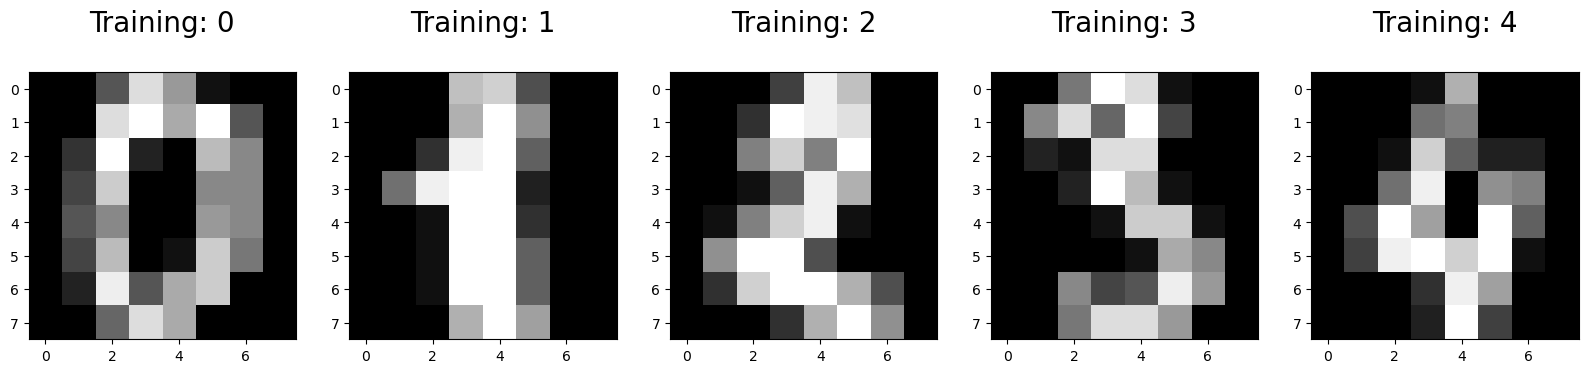

In [11]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}\n', fontsize=20)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
logisticRegr.predict(X_test[0].reshape(1, -1))
logisticRegr.predict(X_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 3])

In [16]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9733333333333334


In [ ]:
import numpy as np
import seaborn as sns
from sklearn import metrics

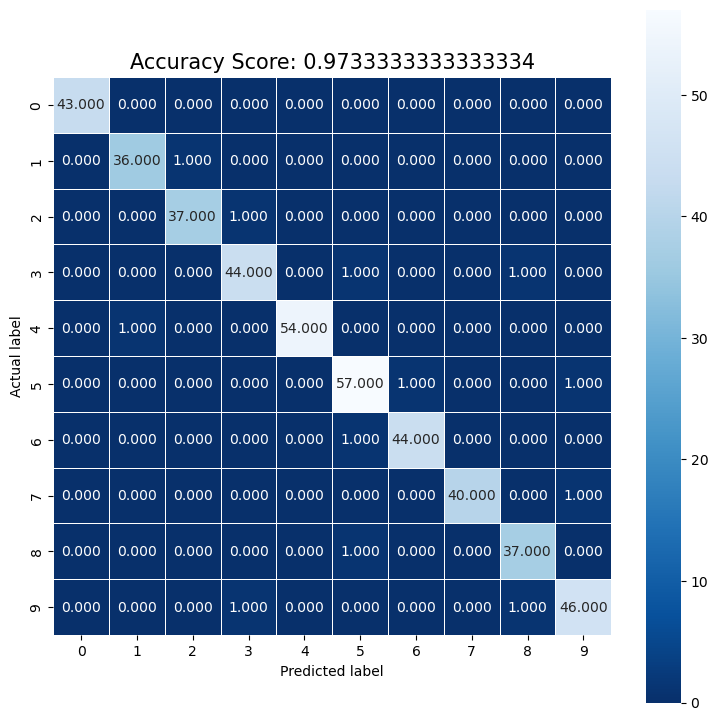

In [18]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15)
plt.show()

### 선형회귀
독립변수 x를 사용하여 종속 변수 y의 움직임을 예측하고 설명하는데 사용된다

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
data = pd.read_csv('../ch03/data/weather.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


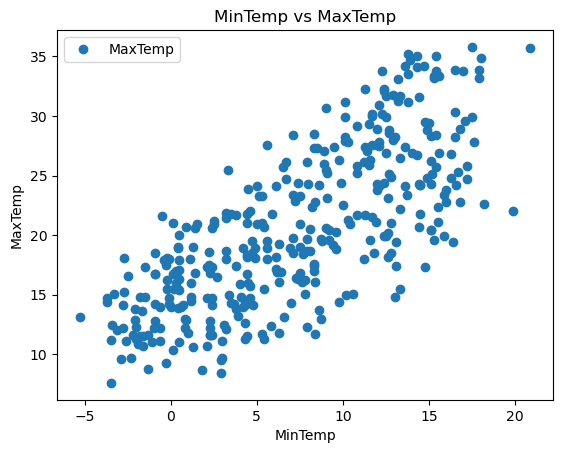

In [22]:
# 데이터를 시각화로 표현
data.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [24]:
X = data['MinTemp'].values.reshape(-1, 1)
y = data['MaxTemp'].values.reshape(-1, 1)

X

array([[ 8. ],
       [14. ],
       [13.7],
       [13.3],
       [ 7.6],
       [ 6.2],
       [ 6.1],
       [ 8.3],
       [ 8.8],
       [ 8.4],
       [ 9.1],
       [ 8.5],
       [10.1],
       [12.1],
       [10.1],
       [12.4],
       [13.8],
       [11.7],
       [12.4],
       [15.6],
       [15.3],
       [16.4],
       [12.8],
       [12. ],
       [15.4],
       [15.6],
       [13.3],
       [12.9],
       [15.1],
       [13.6],
       [15.1],
       [11.6],
       [16.6],
       [13.3],
       [14.5],
       [16.3],
       [17.2],
       [16.5],
       [15. ],
       [14.9],
       [11.8],
       [11.7],
       [ 9.6],
       [ 8.9],
       [10.1],
       [15.5],
       [10.8],
       [ 7.5],
       [12.8],
       [12.6],
       [14.8],
       [19.9],
       [ 9.2],
       [12.4],
       [11.3],
       [ 9.8],
       [14.3],
       [15.1],
       [14.4],
       [15.4],
       [13.8],
       [13.6],
       [14.3],
       [15.9],
       [16.7],
       [12.1],
       [14

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
# 회귀모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()


,Actual,Predicted
0,19.2,22.398074
1,26.5,25.680049
2,32.1,24.922670
3,16.1,19.789324
4,28.3,27.194807


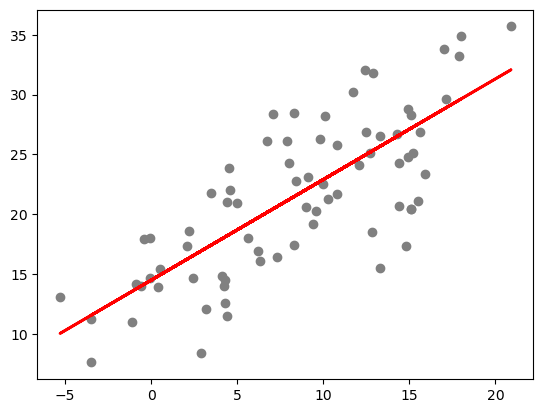

In [27]:
# 테스트 데이터셋을 사용하여 회귀선으로 표현
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**모델 평가**
1. MSE(Mean Squared Error) - 실제값과 예측값의 차이에 제곱을 씌워서 더함
2. RMSE(Root Mean Squared Error) - MSE에서 루트 씌움

In [29]:
print('평균 제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균 제곱법: 18.015704156742945
RMSE: 4.2444910362425015
